In [ ]:
import numpy as np
from spec_id import Highest_likelihood_model_rfv,Analyze_Stack_avgage, Make_model_list,Stack_spec_normwmean_rfv,\
    Stack_model_normwmean_rfv, Stack_model_normwmean_in_mfit_rfv ,Scale_model,Identify_stack, Stack_spec_normwmean, Stack_model_normwmean
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
import pandas as pd
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [ ]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('masslist_mar22.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

gid, rfv, iracm =Readfile('galaxy_mags.dat', is_float=False)
rfv, iracm=np.array([rfv, iracm]).astype(float)

IDc=[]  # low mtor sample
IDd=[]  # high mtor sample

IDmL=[]  # low mass sample
IDmH=[]  # high mass sample

for i in range(len(ids)):
    if 0.11 < comp[i]:
        IDd.append(i)
    if 0.11 > comp[i]:
        IDc.append(i)    
    if 10.931 > lmass[i]:
        IDmL.append(i)
    if 10.931 < lmass[i]:
        IDmH.append(i)

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [ ]:
restc_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
restc_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')
# 
# restc_s=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
# restc_n=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')

In [7]:
restc_s.columns

<TableColumns names=('id','z','DM','L153','n_153','L154','n_154','L155','n_155','L161','n_161','L162','n_162','L163','n_163','L156','n_156','L157','n_157','L158','n_158','L159','n_159','L160','n_160','L135','n_135','L136','n_136','L137','n_137','L138','n_138','L139','n_139','L270','n_270','L271','n_271','L272','n_272','L273','n_273','L274','n_274','L275','n_275')>

In [ ]:
urest=np.zeros(len(ids))
brest=np.zeros(len(ids))
vrest=np.zeros(len(ids))

for i in range(len(ids)):
    if ids[i][0] == 's': 
        urest[i]= restc_s['L153'][int(ids[i][1:])-1]
        brest[i]= restc_s['L154'][int(ids[i][1:])-1]
        vrest[i]= restc_s['L155'][int(ids[i][1:])-1]
    if ids[i][0] == 'n': 
        urest[i]= restc_n['L153'][int(ids[i][1:])-1]
        brest[i]= restc_n['L154'][int(ids[i][1:])-1]
        vrest[i]= restc_n['L155'][int(ids[i][1:])-1]

In [ ]:
gal_table=pd.DataFrame({'ids': ids,'file': speclist, 'redshift': rshift, 'lmass' :lmass, 'comp' : comp,'U': urest, 'B': brest, 'V': vrest},
                       index=np.arange(len(ids)))

In [6]:
gal_table

,B,U,V,comp,file,ids,lmass,redshift
0,7.52715,2.83449,13.56680,0.151158,spec_stacks_jan24/n14713_stack.npy,n14713,10.56,1.224
1,12.18170,3.92698,24.45100,-0.056944,spec_stacks_jan24/n16758_stack.npy,n16758,10.83,1.011
2,22.92200,8.00665,44.43020,0.011287,spec_stacks_jan24/n21156_stack.npy,n21156,11.16,1.252
3,10.03090,3.61370,18.33400,0.214939,spec_stacks_jan24/n21427_stack.npy,n21427,10.73,1.242
4,4.05000,1.45883,7.80588,0.502653,spec_stacks_jan24/n23435_stack.npy,n23435,10.27,1.129
5,10.55170,3.82070,19.02180,0.826232,spec_stacks_jan24/n32566_stack.npy,n32566,10.61,1.148
6,19.06930,6.70882,34.79580,0.369367,spec_stacks_jan24/n34694_stack.npy,n34694,10.94,1.146
7,15.95340,5.48020,30.19170,0.005595,spec_stacks_jan24/n37686_stack.npy,n37686,10.89,1.255
8,20.81730,7.43196,39.23400,0.562565,spec_stacks_jan24/s35774_stack.npy,s35774,10.86,1.222
9,11.55330,4.17144,21.99530,0.278618,spec_stacks_jan24/s38785_stack.npy,s38785,10.88,1.177


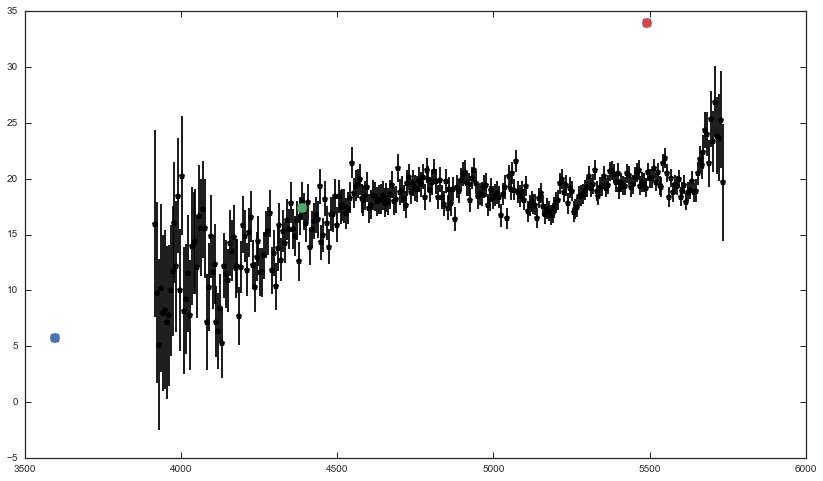

In [11]:
%matplotlib inline

galid=12

uwave,bwave,vwave=[3598.5,4385.9,5490.5]
z=gal_table.loc[galid]['redshift']

wv,fl,er=np.load(gal_table.loc[galid]['file'])

adj = gal_table.loc[galid]['B']/interp1d(wv/(1+z),fl)(bwave)

plt.figure(figsize=[14,8])
plt.errorbar(wv/(1+z),fl*adj,er*adj,color='k',fmt='p')
plt.plot(uwave,gal_table.loc[galid]['U'],'o',ms=10)
plt.plot(bwave,gal_table.loc[galid]['B'],'o',ms=10)
plt.plot(vwave,gal_table.loc[galid]['V'],'o',ms=10)
plt.show()
plt.close()

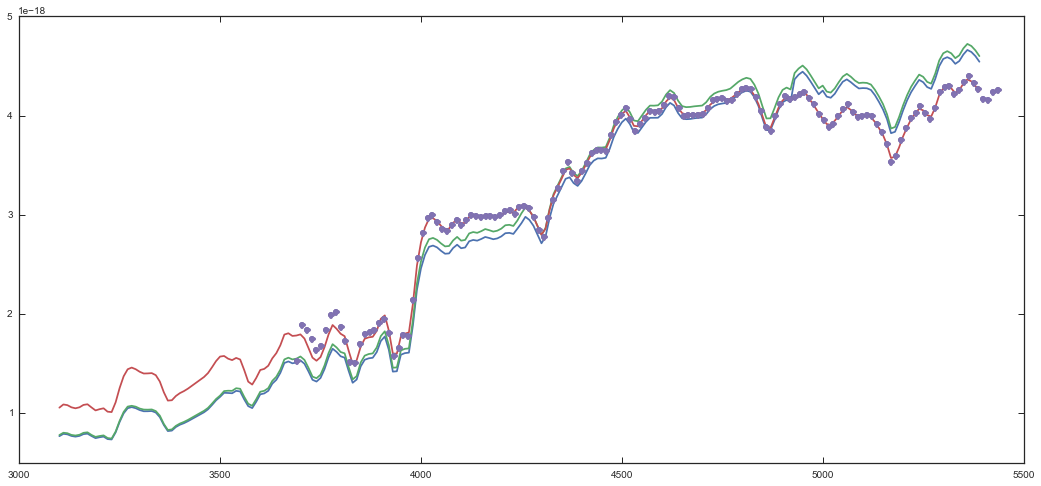

In [71]:
%matplotlib inline
# gal_table.loc[0]['B']
rfb=gal_table.query('comp < 0.11')['B'].tolist()
wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDc],rshift[IDc],rfb,np.arange(3100,5400,10))
wv2,fl2,er2=Stack_spec_normwmean_rfv(speclist[IDc],rshift[IDc],rfv[IDc],np.arange(3100,5400,10))
wv3,fl3,er3=Stack_spec_normwmean(speclist[IDc],rshift[IDc],np.arange(3100,5400,10))

C0=Scale_model(fl,er,fl3)

# plt.figure(figsize=[18,8])
# plt.plot(wv,fl)
# plt.plot(wv2,fl2)
# plt.plot(wv3,C0*fl3)
# plt.show()
# plt.close()

mlist=Make_model_list(ids[IDc],0.019,3.5,0,rshift[IDc])
mwv,mfl=Stack_model_normwmean_rfv(speclist[IDc],mlist,rshift[IDc],rfb,np.arange(3100,5400,10))
mwv2,mfl2=Stack_model_normwmean_rfv(speclist[IDc],mlist,rshift[IDc],rfv[IDc],np.arange(3100,5400,10))
mwv3,mfl3=Stack_model_normwmean(speclist[IDc],mlist,rshift[IDc],np.arange(3100,5400,10))

twv,tfl=np.load('/Users/vestrada/fsps_models_for_fit/galaxy_models/m0.019_a3.5_t0_z1.023_s39170_model.npy')
ifl=interp1d(wv,fl)(twv[8000 < twv[twv<10900]]/2.023)
ier=interp1d(wv,er)(twv[8000 < twv[twv<10900]]/2.023)


C0=Scale_model(fl,er,mfl3)
C1=Scale_model(ifl,ier,tfl[8000 < twv[twv<10900]])

plt.figure(figsize=[18,8])
plt.plot(mwv,mfl)
plt.plot(mwv2,mfl2)
plt.plot(mwv3,C0*mfl3)
plt.plot(twv[twv < 11000]/2.023,tfl[twv < 11000]*C1,"o")
plt.show()
plt.close()